# Model Analysis
using the data with all the features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df = pd.read_csv('data_all.csv').drop('Unnamed: 0', axis=1)

### Features/Labels split

In [3]:
# Lables
y = df['target_return']

# Features
X = df.drop(['Date', 'company', 'target_return'], axis=1)

### Rescaling features

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
X_scaled = scaler.fit_transform(X)

In [7]:
X_standardize = pd.DataFrame(X_scaled,columns=X.columns)
X_standardize.head()

,current_price,momentum,moving_average,moving_volatility,trading_range,exp_market_change,rates,Revenue,Cost_of_Sales,Gross_profit,...,Non_current_liabilities,Current_liabilities,net_cash_op_act,Debt_M,Debt(perc_GDP),Debt_Per_Capita,CPI_perc,GDP_Mill_dollars,GDP_Growth_perc,Unemployment_alt
0,0.571183,-1.191752,0.665252,1.008415,0.816413,-0.752487,1.614377,-0.258862,-0.247648,-0.276560,...,-0.191939,-0.183768,-0.195021,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907
1,0.646429,0.771303,0.577312,0.295273,0.519675,0.497042,0.922660,-0.259293,-0.247743,-0.277666,...,-0.191938,-0.183781,-0.196623,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907
2,0.658742,-0.575385,0.716630,0.579326,0.844317,-0.240694,0.701310,-0.258698,-0.247720,-0.275918,...,-0.191906,-0.183797,-0.194535,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907
3,0.821409,0.422697,0.738470,0.023668,0.535077,2.370180,-0.363935,-0.258394,-0.247383,-0.275685,...,-0.191866,-0.183827,-0.193934,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907
4,0.741284,-0.419215,0.751188,0.345387,0.388110,1.155783,-0.529947,-0.258221,-0.247169,-0.275599,...,-0.191854,-0.183850,-0.193499,0.357897,-0.966469,0.850759,-1.699192,1.431649,1.319792,-0.913907


### Train/Test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=101)

### Training

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

#### PCA

In [11]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [12]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [14]:
pca.n_components_ 

8

In [15]:
lm = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.001)
enet = ElasticNet(alpha=0.001,l1_ratio=0.8)
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)

In [16]:
svr_rbf.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
svr_lin.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
svr_poly.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
enet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
pd.DataFrame(np.array([lm.intercept_, ridge.intercept_, lasso.intercept_,enet.intercept_,svr_rbf.intercept_,svr_lin.intercept_,svr_poly.intercept_]),
             columns=['Intercept'], 
             index=['Linear', 'Ridge', 'Lasso','ElasticNet','svr_rbf','svr_lin','svr_poly'])

,Intercept
Linear,0.026272
Ridge,0.026272
Lasso,0.026272
ElasticNet,0.026272
svr_rbf,0.069671
svr_lin,0.027168
svr_poly,0.050281


### Testing

In [24]:
from sklearn import metrics

In [25]:
# Get predictions for training data
fit_lm = lm.predict(X_train)
fit_ridge = ridge.predict(X_train)
fit_lasso = lasso.predict(X_train)
fit_enet = enet.predict(X_train)
fit_svr_rbf = svr_rbf.predict(X_train)
fit_svr_lin = svr_lin.predict(X_train)
fit_svr_poly = svr_poly.predict(X_train)

In [34]:
# Print MSE for models
print('MSE (train)')
print('Linear:     ', metrics.mean_squared_error(y_train, fit_lm))
print('Ridge:      ', metrics.mean_squared_error(y_train, fit_ridge))
print('Lasso:      ', metrics.mean_squared_error(y_train, fit_lasso))
print('ElasticNet: ', metrics.mean_squared_error(y_train, fit_enet))
print('SVR_rbf:    ', metrics.mean_squared_error(y_train, fit_svr_rbf)) 
print('SVR_lin:    ', metrics.mean_squared_error(y_train, fit_svr_lin)) 
print('SVR_poly:   ', metrics.mean_squared_error(y_train, fit_svr_poly))

MSE (train)
Linear:      0.0153573030436
Ridge:       0.0153573269711
Lasso:       0.0153637710057
ElasticNet:  0.0153614681326
SVR_rbf:     0.0100515138518
SVR_lin:     0.0154946747415
SVR_poly:    0.0131803598654


In [27]:
print('MSE (train)')
print('Linear:     ', lm.score(X_train, y_train))
print('Ridge:      ', ridge.score(X_train, y_train))
print('Lasso:      ', lasso.score(X_train, y_train))
print('ElasticNet: ', enet.score(X_train, y_train))
print('SVR_rbf:    ', svr_rbf.score(X_train, y_train))
print('SVR_lin:    ', svr_lin.score(X_train, y_train)) 
print('SVR_poly:   ', svr_poly.score(X_train, y_train))

MSE (train)
Linear:      0.0554859096172
Ridge:       0.0554844380187
Lasso:       0.0550881131257
ElasticNet:  0.0552297458071
SVR_rbf:     0.381805748334
SVR_lin:     0.0470371928137
SVR_poly:    0.189373578565


In [28]:
def adj_r2_score(model,y,yhat):
    adj = 1 - (1 - metrics.r2_score(y,yhat)) * float(len(y)-1) / (len(y)-len(model.coef_)-1)
    return adj

In [29]:
print('Adjusted R-SQUARED SCORES')
print('Linear:     ', adj_r2_score(lm, y_train, lm.predict(X_train)))
print('Ridge:      ', adj_r2_score(ridge, y_train, ridge.predict(X_train)))
print('Lasso:     ', adj_r2_score(lasso, y_train, lasso.predict(X_train)))
print('ElasticNet:', adj_r2_score(enet, y_train, enet.predict(X_train)))
print('svr_lin:    ', adj_r2_score(svr_lin, y_train, svr_lin.predict(X_train)))

Adjusted R-SQUARED SCORES
Linear:      0.0245182345227
Ridge:       0.0245167146751
Lasso:      0.0241073955232
ElasticNet: 0.0242536718992
svr_lin:     0.0432405282433


---
### Predicting

In [30]:
pred_lm = lm.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)
pred_enet = enet.predict(X_test)
pred_svr_rbf = svr_rbf.predict(X_test) 
pred_svr_lin = svr_lin.predict(X_test)
pred_svr_poly = svr_poly.predict(X_test)

### Testing

Firstly we plot the actual returns vs. the predictions by our models.

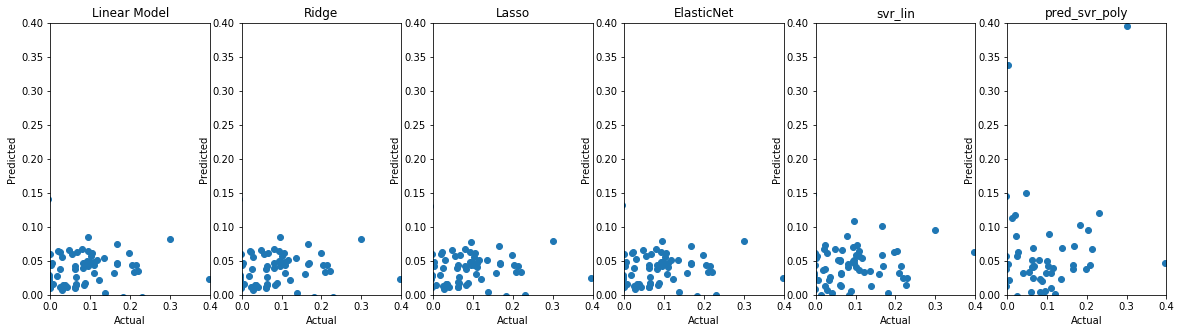

In [31]:
# Create figure and axes
f, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=6)

# Create list of titles and predictions to use in for loop
pred = [pred_lm, pred_ridge, pred_lasso, pred_enet,pred_svr_lin,pred_svr_poly]
title = ['Linear Model', 'Ridge', 'Lasso', 'ElasticNet','svr_lin','pred_svr_poly']

# Loop through all axes to plot each model's results 
for i in range(6):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 0.4)
    ax[i].set_ylim(0, 0.4)
    ax[i].scatter(y_test,pred[i]) 

Secondly we calculate the MSE for each model on our testing set. 

In [32]:
print('MSE:')
print('Linear:     ', metrics.mean_squared_error(y_test, pred_lm))
print('Ridge:      ', metrics.mean_squared_error(y_test, pred_ridge))
print('Lasso:      ', metrics.mean_squared_error(y_test, pred_lasso))
print('ElasticNet: ', metrics.mean_squared_error(y_test, pred_enet))
print('SVR_rbf:    ', metrics.mean_squared_error(y_test, pred_svr_rbf)) 
print('SVR_lin:    ', metrics.mean_squared_error(y_test, pred_svr_lin)) 
print('SVR_poly:   ', metrics.mean_squared_error(y_test, pred_svr_poly))

MSE:
Linear:      0.0144175432366
Ridge:       0.0144192533108
Lasso:       0.0144206715119
ElasticNet:  0.0144191406772
SVR_rbf:     0.0146746348289
SVR_lin:     0.0140535845366
SVR_poly:    0.0782794060581


In [33]:
print('Adjusted R-SQUARED SCORES')
print('Linear:     ', adj_r2_score(lm, y_test, lm.predict(X_test)))
print('Ridge:      ', adj_r2_score(ridge, y_test, ridge.predict(X_test)))
print('Lasso:      ', adj_r2_score(lasso, y_test, lasso.predict(X_test)))
print('ElasticNet: ', adj_r2_score(enet, y_test, enet.predict(X_test)))
print('svr_lin: ', adj_r2_score(svr_lin, y_test, svr_lin.predict(X_test)))

Adjusted R-SQUARED SCORES
Linear:      0.0031400303586
Ridge:       0.00302179214373
Lasso:       0.00292373467264
ElasticNet:  0.00302957987666
svr_lin:  0.0918737553369
